# In-class exercises Class 22

---

Today we will start to learn how to use some Machine Learning tools.  I'm excited, and I hope you are too.  Machine Learning is an important piece of data science and artificial intellegence.  Experience in both of these develop skills that SO SO SO many science and industry jobs are looking for these days!  I won't be able to get you the skills you need to land one of those jobs, but hopefully I'll help lay the foundation for learning more.  The documentation is out there - with the foundational knowledge and desire you can become a master of these tools on your own.    


At first, I know that the Pandas DataFrame seemed like an extra layer that wasn't necessary, but it was designed to make working with Machine Learning easier.  So, as we do some of that you will see the value.  Let's do it!  




In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Today, we are going to play with a very simple Support Vector Machine example (SVN).  SVNs are NOT very simple, but this example is, and it will make it very clear how classification works.  If you are interested, you can read about support vector machines here:

https://scikit-learn.org/stable/modules/svm.html


You don't need to understand how the SVN works, just understand it is an example classification using machine learning - just to show you how powerful it can be.  

First, let's make a similar dataset to the one I showed in class as a classification example.  We will start by making 'blobs' of data.  We could do this ourselves with Gaussian random numbers (or some other distribution), but scikit-learn comes with a blob tool, so let's learn something new!  Documentation here:

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html

Let's make our first blob...  


(50, 2)


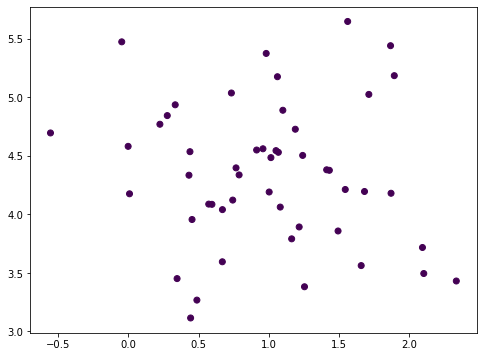

In [14]:
#We will start using a few sklearn tools
#from sklearn.datasets.samples_generator import make_blobs
from sklearn.datasets import make_blobs
from sklearn.svm import SVC  #This is the Support Vector machine code

#Let's make a blob and plot it!  
# create 50 separable points
X, y = make_blobs(n_samples=50, centers=1,
                  random_state=0, cluster_std=0.60)

#Note, in this case X, is a matrix that containes both features. In this case the features can be thought of as x and y coordinates!
print(X.shape)

# plot the data
fig, ax = plt.subplots(figsize=(8, 6))

#Let's make the scatter plot
ax.scatter(X[:, 0], X[:, 1], c=y)  #X[:, 0] is x;  X[:, 1]  is y 






Success - that looks like a bolb to me!  

## **EXERCISE 1**:  
<span style="color:red">  Make another blob with a different random state and plot it.  Is the plot different?  What happens if you change 'cluster_std' or 'n_samples'? </red>
    


In [15]:
#put code and answers here



Let's make two blobs:

(50, 2)
(50,)
[1 1 0 0 1 1 1 1 1 0 0 0 0 1 0 0 0 1 0 0 1 1 1 1 1 0 0 0 1 0 1 0 0 0 0 1 1
 0 1 0 1 0 1 1 0 1 1 0 1 0]


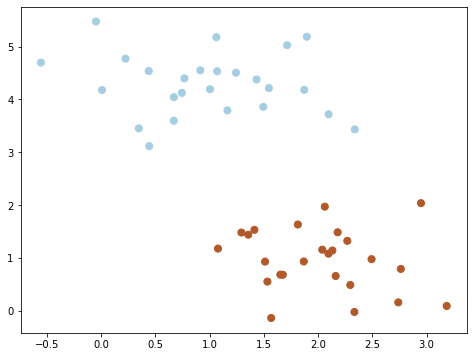

In [16]:
#Let's make some blobs!  
# create 50 separable points
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)

print(X.shape)
print(y.shape)
print(y)  #Why keeps track of which blob x values are in!  

# plot the data
fig, ax = plt.subplots(figsize=(8, 6))
point_style = dict(cmap='Paired', s=50)  #This is making a color map - don't worry about it.  It just helps us automate the point coloring
ax.scatter(X[:, 0], X[:, 1], c=y, **point_style)


Great - since we changed "centers" to 2, we got two distinct class - two blobs!  Let's make a "linear" instance of the SVC class, and "fit" the module to our data...

Whatever that means...


In [17]:
# fit the support vector classifier model
clf = SVC(kernel='linear')
clf.fit(X, y)




SVC(kernel='linear')

No errors, so that must have worked.  Whatever the SVM does, we seemed to have just done it.  For now, SVN is a 'black box', but we trained it with our data set.  So, awesome!  Wellcome to the powerful world of machine learning!  

The SVM is a a classifier, when we train it we give it a known set of data 'X', where the known classification is stored in 'y'.  We train the classifier!

So, in principle we should now be able to use the trained SVM to classify a set of data with no labels.  So, let's make a new dataset with two blobs, but ignore their known classification.


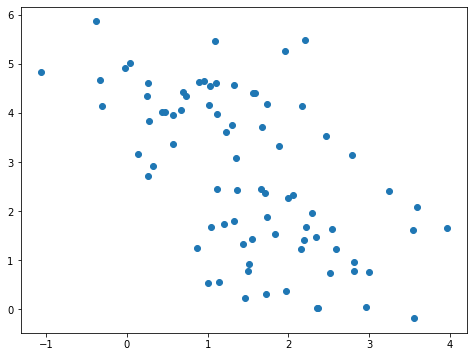

In [18]:
# create some new points to predict
X2, y2_true = make_blobs(n_samples=80, centers=2,
                   random_state=0, cluster_std=0.8)

#X2 = X2[50:]  #select some piece of X2

# plot the data
fig, ax = plt.subplots(figsize=(8, 6))
#This is making a color map - don't worry about it.  It just helps us automate the point coloring
ax.scatter(X2[:, 0], X2[:, 1])

So, lets try to use our newly trained SVN classifier to 'predict' the classes in our new dataset.  

In [19]:
# predict the labels
y2_predict = clf.predict(X2)

It ran!  But, did it work?  Let's convice ourselves that it did.  How?  Well, let's plot the color-coded results based on y_predict and see how well the match the y_true plot....  Let's start with the prediction first...

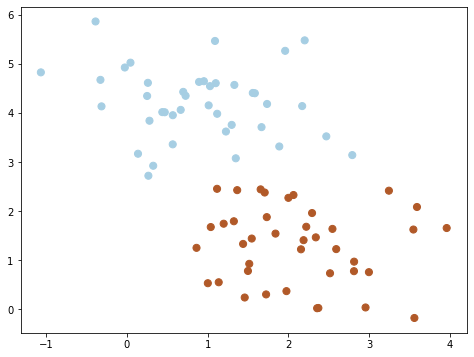

In [20]:
# plot the data
fig, ax = plt.subplots(figsize=(8, 6))
point_style = dict(cmap='Paired', s=50)  #This is making a color map - don't worry about it.  It just helps us automate the point coloring
ax.scatter(X2[:, 0], X2[:, 1], c=y2_predict, **point_style)

Looks pretty good!  Let's compare to the y_true

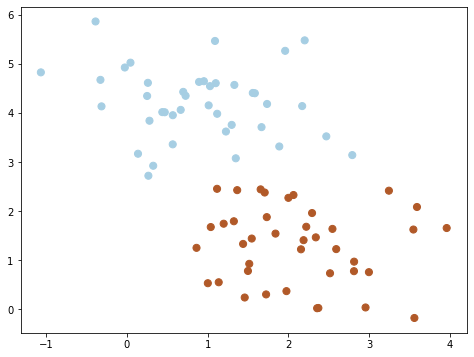

In [21]:
# plot the data
fig, ax = plt.subplots(figsize=(8, 6))
point_style = dict(cmap='Paired', s=50)  #This is making a color map - don't worry about it.  It just helps us automate the point coloring
ax.scatter(X2[:, 0], X2[:, 1], c=y2_true, **point_style)

Looks perfect?  We can check by comparing y values...  

In [22]:
for i in range(0,50):
    print(y2_true[i],y2_predict[i])
    if y2_true[i]!=y2_predict[i]:
        print(f"classificantion incorrect for point {i}!!!!!")

0 0
1 1
0 0
0 0
1 1
1 1
1 1
1 1
1 1
1 1
0 0
1 1
1 1
1 1
0 0
0 0
1 1
0 0
0 0
1 1
1 1
0 0
1 1
0 0
0 0
0 0
1 1
0 0
0 0
0 0
1 1
0 0
0 0
1 1
0 0
0 0
0 0
1 1
1 1
1 1
1 1
0 0
1 1
1 1
0 0
1 1
1 1
0 0
1 1
0 0


Wow! looks like they all matched.  

## **EXERCISE 2**:  
<span style="color:red">  What if we increased the standard deviation when we generate the blob for X2?  Try to change it from 0.8 to 1.2 above.  Are all of the predictions correct this time?  Why or why not.       </red>
    

 
    
    
   

Put your answer here.

---

## Back to the Iris dataset.

Remember last time we learned how to load the Iris dataset into a Pandas DataFrame:



In [11]:
iris_df = pd.read_csv('data/iris.data')
#Will show 10 random lines of the DataFrame
iris_df.sample(10)

,sepal.length,sepal.width,petal.length,petal.width,variety
141,6.9,3.1,5.1,2.3,Iris-virginica
61,5.9,3.0,4.2,1.5,Iris-versicolor
144,6.7,3.3,5.7,2.5,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
25,5.0,3.0,1.6,0.2,Iris-setosa
30,4.8,3.1,1.6,0.2,Iris-setosa
32,5.2,4.1,1.5,0.1,Iris-setosa
99,5.7,2.8,4.1,1.3,Iris-versicolor
7,5.0,3.4,1.5,0.2,Iris-setosa
120,6.9,3.2,5.7,2.3,Iris-virginica


And, we made the Iris scatter plot...

It is possible to work directly with data frames and make scatter plots.  First let's do it with one variable and all species on the same plot...  

Text(0.5, 1.0, 'All species!')

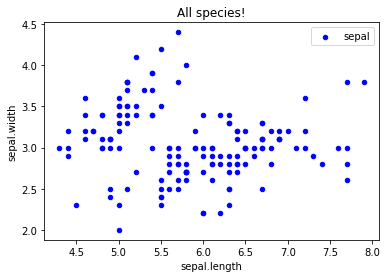

In [12]:

                
iris_df.plot.scatter(x='sepal.length', y='sepal.width', 
                     color='Blue', label='sepal')
plt.title("All species!")


That was pretty nice, but it includes all three species.  We can select out one species like this...  

In [66]:
setosa_df = iris_df[iris_df["variety"] == "Iris-setosa"]  #Make a dataFrame that only containes setosa.  
setosa_df.sample(5)  #Let's make sure it only containes setosa...



,sepal.length,sepal.width,petal.length,petal.width,variety
46,5.1,3.8,1.6,0.2,Iris-setosa
38,4.4,3.0,1.3,0.2,Iris-setosa
35,5.0,3.2,1.2,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa


Looks good.  Lets plot it...  

Text(0.5, 1.0, 'Setosa Only!')

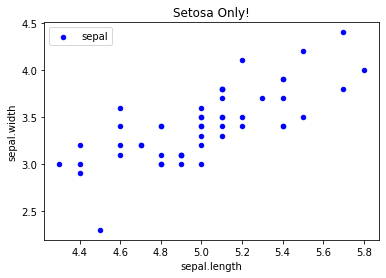

In [68]:
setosa_df.plot.scatter(x='sepal.length', y='sepal.width', 
                     color='Blue', label='sepal')
plt.title("Setosa Only!")

Finally, we drew all three species on the same plot.

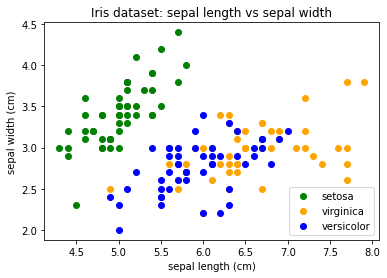

In [69]:
colors = ['green', 'orange', 'blue']
label_species = ['setosa' ,'virginica', 'versicolor']

plt.scatter(  
        iris_df[iris_df["variety"] == "Iris-setosa"]['sepal.length'],        
        iris_df[iris_df["variety"] == "Iris-setosa"]['sepal.width'],
        color=colors[0],              
        label=label_species[0]   
)

plt.scatter(  
        iris_df[iris_df["variety"] == "Iris-virginica"]['sepal.length'],        
        iris_df[iris_df["variety"] == "Iris-virginica"]['sepal.width'],
        color=colors[1],              
        label=label_species[1]   
)

plt.scatter(  
        iris_df[iris_df["variety"] == "Iris-versicolor"]['sepal.length'],        
        iris_df[iris_df["variety"] == "Iris-versicolor"]['sepal.width'],
        color=colors[2],              
        label=label_species[2]   
)


plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.title('Iris dataset: sepal length vs sepal width')
plt.legend(loc='lower right')

plt.show()


## **EXERCISE 3**:  
<span style="color:red">  Let's pretend there were only two classes of Iris for this exercise:  virginica and versicolor.  Explain how you might train an SVN to learn how to classify the two types.       </red>
    

 
    
    
   

Put your answer here.